In [1]:
import numpy as np
import numpy.matlib
from numpy import exp, abs, sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import tensorflow as tf
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from itertools import product

tf.keras.backend.set_floatx('float64');

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### DATA

In [2]:
# Size of the data
train_size = 60000; # Size of the training set
test_size = 6000; # Size of the test set
param_in = 9; # Input size to the neural network
parameter_cal = 7; # Size of training variables

l = 1/12 # 1 month of delivery, fixed
# NOTE: T_1 = tau, assumption for all the experiments

params_range = np.loadtxt('params_pointwise_with_NS.dat')
price = np.loadtxt('price_pointwise_with_NS.dat')

In [3]:
# Train and test sets
params_range_train = params_range[np.arange(train_size), :] # size=[train_size, param_in]
params_range_test = params_range[train_size + np.arange(test_size), :] # size=[test_size, param_in]

price_train = price[np.arange(train_size)] # size=train_size
price_test = price[train_size + np.arange(test_size)] # size=test_size

## FIRST STEP

In [4]:
# Define the neural network. There are many possibilites here.
print('Initializing model')

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation='elu');
        self.dense2 = tf.keras.layers.Dense(30, activation='elu');
        self.dense3 = tf.keras.layers.Dense(30, activation='elu')
        self.dense4 = tf.keras.layers.Dense(1, activation = None)
        
    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return x

# Create an instance of the model
model = MyModel()

# Choose optimizer and type of loss function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.MeanSquaredError();

model.compile(loss = loss_object,
              optimizer = optimizer)
model.build(input_shape=(1,param_in))
model.summary()

model.load_weights('opt_weight_pointwise_with_NS.h5')

Initializing model
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  300       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  930       
_________________________________________________________________
dense_3 (Dense)              multiple                  31        
Total params: 2,191
Trainable params: 2,191
Non-trainable params: 0
_________________________________________________________________


### Training (if the weights are not loaded)

Compiling train step
Compiling test step


Starting to train
Epoch 1/200, Loss: 0.5630541141,  Test Loss: 0.1466801641, Delta Test Loss: 0.1466801641
Epoch 2/200, Loss: 0.0625364158,  Test Loss: 0.0283565915, Delta Test Loss: 0.1183235726
Epoch 3/200, Loss: 0.0290316682,  Test Loss: 0.0230910699, Delta Test Loss: 0.0052655216
Epoch 4/200, Loss: 0.0274551181,  Test Loss: 0.0227747089, Delta Test Loss: 0.0003163610
Epoch 5/200, Loss: 0.0266386153,  Test Loss: 0.0252818502, Delta Test Loss: 0.0025071413
Epoch 6/200, Loss: 0.0270111008,  Test Loss: 0.0241119650, Delta Test Loss: 0.0011698852
Epoch 7/200, Loss: 0.0265773505,  Test Loss: 0.0218093644, Delta Test Loss: 0.0023026006
Epoch 8/200, Loss: 0.0254392263,  Test Loss: 0.0313004721, Delta Test Loss: 0.0094911078
Epoch 9/200, Loss: 0.0239953342,  Test Loss: 0.0260275620, Delta Test Loss: 0.0052729102
Epoch 10/200, Loss: 0.0220529822,  Test Loss: 0.0219502968, Delta Test Loss: 0.0040772651
Epoch 11/200, Loss: 0.0201510270,  Test Loss: 0.

Epoch 45/200, Loss: 0.0009186202,  Test Loss: 0.0003482539, Delta Test Loss: 0.0010663541
Epoch 46/200, Loss: 0.0007903952,  Test Loss: 0.0009183529, Delta Test Loss: 0.0005700990
Epoch 47/200, Loss: 0.0008130462,  Test Loss: 0.0006543161, Delta Test Loss: 0.0002640368
Epoch 48/200, Loss: 0.0008046314,  Test Loss: 0.0012956541, Delta Test Loss: 0.0006413380
Epoch 49/200, Loss: 0.0007473013,  Test Loss: 0.0008618549, Delta Test Loss: 0.0004337993
Epoch 50/200, Loss: 0.0007872844,  Test Loss: 0.0003214021, Delta Test Loss: 0.0005404527
Epoch 51/200, Loss: 0.0008220824,  Test Loss: 0.0003715990, Delta Test Loss: 0.0000501969
Epoch 52/200, Loss: 0.0007387643,  Test Loss: 0.0006729057, Delta Test Loss: 0.0003013067
Epoch 53/200, Loss: 0.0007209447,  Test Loss: 0.0007220923, Delta Test Loss: 0.0000491866
Epoch 54/200, Loss: 0.0007502119,  Test Loss: 0.0003934633, Delta Test Loss: 0.0003286290
Epoch 55/200, Loss: 0.0007011105,  Test Loss: 0.0005692082, Delta Test Loss: 0.0001757450
Epoch 56/2

Epoch 136/200, Loss: 0.0003143292,  Test Loss: 0.0001216639, Delta Test Loss: 0.0000009158
Epoch 137/200, Loss: 0.0003186202,  Test Loss: 0.0004363225, Delta Test Loss: 0.0003146586
Epoch 138/200, Loss: 0.0003040882,  Test Loss: 0.0001670673, Delta Test Loss: 0.0002692552
Epoch 139/200, Loss: 0.0002668811,  Test Loss: 0.0002515582, Delta Test Loss: 0.0000844909
Epoch 140/200, Loss: 0.0003477568,  Test Loss: 0.0001325682, Delta Test Loss: 0.0001189900
Epoch 141/200, Loss: 0.0002774491,  Test Loss: 0.0019132225, Delta Test Loss: 0.0017806542
Epoch 142/200, Loss: 0.0003232271,  Test Loss: 0.0001601642, Delta Test Loss: 0.0017530582
Epoch 143/200, Loss: 0.0003041340,  Test Loss: 0.0001807795, Delta Test Loss: 0.0000206152
Epoch 144/200, Loss: 0.0002779664,  Test Loss: 0.0003509046, Delta Test Loss: 0.0001701251
Epoch 145/200, Loss: 0.0003043944,  Test Loss: 0.0001056000, Delta Test Loss: 0.0002453046
Epoch 146/200, Loss: 0.0002801216,  Test Loss: 0.0001292507, Delta Test Loss: 0.0000236507

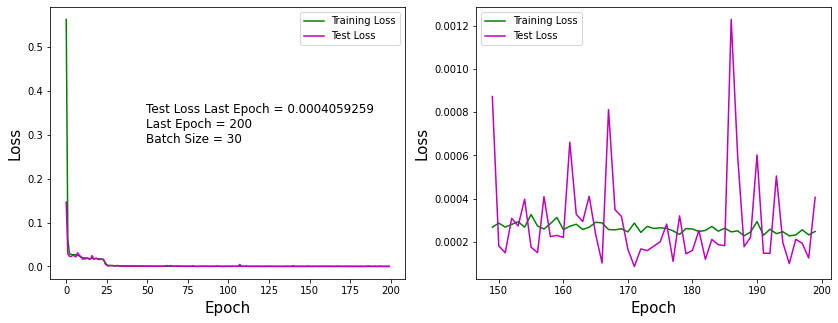

In [32]:
# Choose what type of information you want to print
train_loss = tf.keras.metrics.Mean(name='train_mean')
test_loss = tf.keras.metrics.Mean(name='test_mean')

EPOCHS = 200;        # Number of steps training
batch_size = 30;

patience = 20
delta = 0.0002

# To speed up training we need to create a some object which can send the data 
# fast to the GPU. Notice that they depend on the bactch_size
train_ds = tf.data.Dataset.from_tensor_slices(
              (params_range_train, price_train)).shuffle(10000).batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((params_range_test, price_test)).batch(batch_size)  

# Define the early stop function
def early_stop(loss_vec):
    delta_loss = np.abs(np.diff(loss_vec))
    delta_loss = delta_loss[-patience:]
    return (np.prod(delta_loss < delta))
    
# Next we compile a few low level functions which will compute the actual gradient.
print('Compiling train step')
@tf.function
def train_step(input_param, prices):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(input_param, training=True)
        loss = loss_object(prices, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

print('Compiling test step')
@tf.function
def test_step(input_param, prices):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(input_param, training=False)
    t_loss = loss_object(prices, predictions)

    test_loss(t_loss)

# Vectors of loss
test_loss_vec = np.array([0.0])
train_loss_vec = np.array([0.0])

# We start to train the network.
print('\n\nStarting to train')
for epoch in range(EPOCHS):
    
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    test_loss.reset_states()

    
    for input_param, prices in train_ds:
        # For each batch of images, and prices, compute the gradient and update 
        # the gradient of the network
        train_step(input_param, prices)

    for test_images, test_prices in test_ds:
        # For each of the test data, compute how the network performs on the data
        # We do not compute any gradients here
        test_step(test_images, test_prices)

    # Print some usfull information
    template = 'Epoch {0}/{1}, Loss: {2:.10f},  Test Loss: {3:.10f}, Delta Test Loss: {4:.10f}'
    print(template.format(epoch+1,
                          EPOCHS,
                          train_loss.result().numpy(),
                          test_loss.result().numpy(),
                          np.abs(test_loss.result()-test_loss_vec[-1])
                          ))
    
    train_loss_vec = np.append(train_loss_vec, train_loss.result())
    test_loss_vec = np.append(test_loss_vec, test_loss.result())
    
    if (epoch > patience):
        if early_stop(test_loss_vec):
            print('Early stopping at epoch = ', epoch+1)
            break

model.save_weights('opt_weight_pointwise_with_NS.h5')

l = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(np.arange(epoch+1), train_loss_vec[1:], '-g')
plt.plot(np.arange(epoch+1), test_loss_vec[1:], '-m')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch", fontsize=15, labelpad=5);
plt.ylabel("Loss", fontsize=15, labelpad=5);
text = 'Test Loss Last Epoch = %.10f' %test_loss.result().numpy() + '\n'+ 'Last Epoch = %d' %(epoch+1)  + '\n'+ 'Batch Size = %d' %batch_size 
plt.text(epoch//4, train_loss_vec[1]/2, text , fontsize=12);

plt.subplot(1,2,2)
plt.plot(np.arange(epoch-50, epoch+1), train_loss_vec[(epoch-50+1):], '-g')
plt.plot(np.arange(epoch-50, epoch+1), test_loss_vec[(epoch-50+1):], '-m')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch", fontsize=15, labelpad=5);
plt.ylabel("Loss", fontsize=15, labelpad=5);

#l.savefig('loss_step1_pointwise_with_NS.pdf')

In [5]:
price_predicted_train = model(params_range_train).numpy()
price_predicted_train = np.squeeze(price_predicted_train)
price_predicted_test = model(params_range_test).numpy()
price_predicted_test = np.squeeze(price_predicted_test)

In [6]:
err_training_train = abs(price_predicted_train-price_train)/price_train
err_training_test = abs(price_predicted_test-price_test)/price_test

In [7]:
# I cluster the errors so to create the same plot as in the grid approach
K_vector = np.array([31.6, 31.7, 31.9, 32.1, 32.3, 32.5, 32.7, 32.9, 33.1, 33.2])
tau_vector = np.array([1/12, 1/12+1/24, 2/12+1/24, 3/12+1/24, 4/12+1/24, 5/12+1/24, 6/12+1/24, 1])
N1 = len(K_vector)-1
N2 = len(tau_vector)-1 

mean_square_err_training_train = np.zeros((N1,N2))
max_square_err_training_train = np.zeros((N1,N2))
for k in np.arange(N2):
    pos_tau = (params_range_train[:,1]>= tau_vector[k])*(params_range_train[:,1]< tau_vector[k+1])
    for j in np.arange(N1):
        pos_K = (params_range_train[:,0]>= K_vector[j])*(params_range_train[:,0]< K_vector[j+1])
        mean_square_err_training_train[j,k] = 100*np.mean(err_training_train[pos_K*pos_tau])
        max_square_err_training_train[j,k] = 100*np.max(err_training_train[pos_K*pos_tau])

mean_square_err_training_test = np.zeros((N1,N2))
max_square_err_training_test = np.zeros((N1,N2))
for k in np.arange(N2):
    pos_tau = (params_range_test[:,1]>= tau_vector[k])*(params_range_test[:,1]< tau_vector[k+1])
    for j in np.arange(N1):
        pos_K = (params_range_test[:,0]>= K_vector[j])*(params_range_test[:,0]< K_vector[j+1])
        mean_square_err_training_test[j,k] = 100*np.mean(err_training_test[pos_K*pos_tau])
        max_square_err_training_test[j,k] = 100*np.max(err_training_test[pos_K*pos_tau])

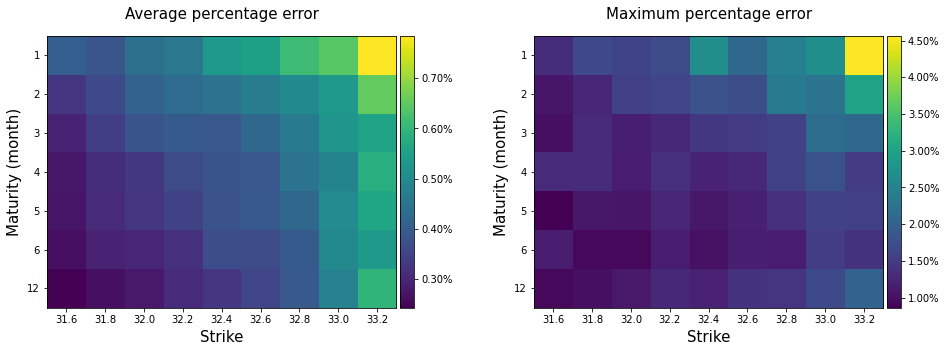

In [8]:
K_label = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_label = ['1', '2', '3', '4', '5', '6', '12']

f = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
plt.title("Average percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(mean_square_err_training_train))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

ax = plt.subplot(1,2,2)
plt.title("Maximum percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(max_square_err_training_train))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);
#f.savefig('error_step1_train_pointwise_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)

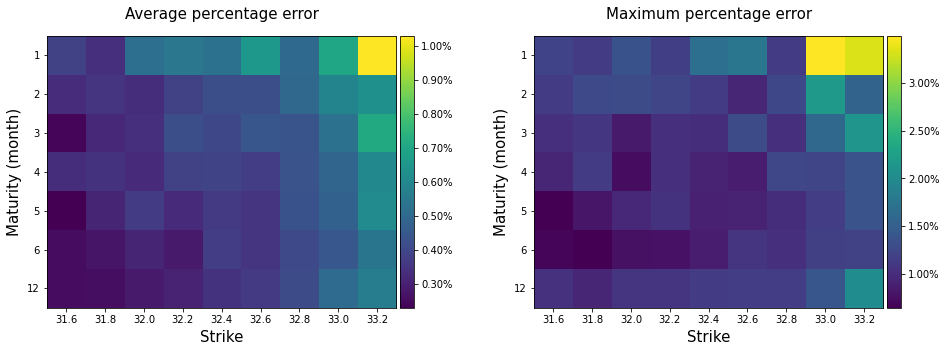

In [9]:
K_label = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_label = ['1', '2', '3', '4', '5', '6', '12']

f = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
plt.title("Average percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(mean_square_err_training_test))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

ax = plt.subplot(1,2,2)
plt.title("Maximum percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(max_square_err_training_test))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);
#f.savefig('error_step1_test_pointwise_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)

## SECOND STEP

In [19]:
# Size of the data: I need to re-define these to match with the 
# gridbased approach setting an extract data correctly

train_size = 40000; # Size of the training set
test_size = 4000; # Size of the test set
calibration_size = 4000;
param_in = 9; # Input size to the neural network
parameter_cal = 7; # Size of training variables

l = 1/12 # 1 month of delivery, fixed
# NOTE: T_1 = tau, assumption for all the experiments

K_vector = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_vector = np.array([1/12, 2/12, 3/12, 4/12, 5/12, 6/12, 1]) 

N1 = len(K_vector)
N2 = len(tau_vector)

calibration_grid = N1*N2;
grid = np.array(list(product(K_vector, tau_vector))).reshape(N1, N2, 2)
np_input_first = np.reshape(grid, (N1*N2, 2)); #reshape reads by rows

params_cal = np.loadtxt('params_gridbased_with_NS.dat')
price_cal = np.reshape(np.loadtxt('price_gridbased_with_NS.dat'), newshape = (train_size+test_size, N1, N2), order ='F')

params_cal = params_cal[train_size + np.arange(test_size), :] # size=[test_size, parameter_cal]
price_cal = price_cal[train_size + np.arange(test_size), :, :] # size=[test_size, N1, N2]

params_cal.shape, price_cal.shape

((4000, 7), (4000, 9, 7))

In [ ]:
# The network is done training. We are ready to start on the Calibration step
print('\n\nCalibration step')

EPOCHS_CAL = 1000     # Number of steps calebrating

# Choose optimizer and type of loss function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.MeanSquaredError();

calibration_loss = tf.keras.metrics.Mean(name='calibration_mean')

print('Compiling calibration step')
def calibration_step(input_guess, tf_input_first, prices):
        
        with tf.GradientTape() as tape:
            tape.watch(input_guess)
            #print('input_guess =', input_guess.shape)
            input_guess_rep = tf.tile(input_guess, [N1*N2, 1])
            #print('input guess rep = ', input_guess_rep.shape)
            network_input = tf.concat([tf_input_first,input_guess_rep], axis = 1);
            prediction = model(network_input)
            c_loss = loss_object(prices, prediction)
        calibration_loss(c_loss)
        grads = tape.gradient(c_loss, [input_guess])
        optimizer.apply_gradients(zip(grads, [input_guess]))

# We need to guess some initial model parameters.
input_guess = params_cal + np.random.rand(calibration_size, parameter_cal)*np.array([0.05, 0.05, 0.5, 0.5, 0.05, 0.05, 0.05])

# Prepare the data to have the right shape
tf_input_first = tf.constant(np_input_first);

# I just copy the starting parameters for convenience. This is not necessary
old_input_guess = input_guess.copy();

tf_input_guess = tf.convert_to_tensor(input_guess)

new_input_guess = np.zeros((calibration_size,parameter_cal))
# Start the actual calibration
for j in range(calibration_size):
    np_price_local = np.reshape(price_cal[j,:,:], [N1*N2, 1]);
    tf_var_input_guess_local = tf.Variable(tf.reshape(tf_input_guess[j,:], (1,parameter_cal)))
    calibration_step_local = tf.function(calibration_step)       
    for epoch in range(EPOCHS_CAL):
        calibration_loss.reset_states()
        calibration_step_local(tf_var_input_guess_local, tf_input_first, np_price_local)

        template = 'Set {}: Epoch_cal {}, Loss: {}'
        print(template.format(j,
                              epoch+1,
                          calibration_loss.result(),
                          ))
    new_input_guess[j,:]= tf_var_input_guess_local.numpy();

X = new_input_guess-old_input_guess
print(np.linalg.norm(X, 'fro'));


In [11]:
#np.savetxt('params_calibrated_pointwise_adam_with_NS.dat', new_input_guess)
new_input_guess = np.loadtxt('params_calibrated_pointwise_adam_with_NS.dat')

In [12]:
# Errors and plots
percentage_err = np.abs(new_input_guess-params_cal)/np.abs(params_cal)
mean_percentage_err = np.mean(percentage_err, axis = 0)*100
percentage_err_copy = percentage_err.copy()
percentage_err_copy.sort(axis=0)
median_percentage_err = percentage_err_copy[calibration_size//2, :]*100

In [13]:
mean_percentage_err

array([46.88350206, 26.28245296,  4.59395456,  0.16529953,  2.71541713,
       11.23700693,  1.3319791 ])

In [14]:
median_percentage_err

array([47.32255736, 27.64915829,  4.50033201,  0.11741921,  1.88913598,
        7.67285546,  1.11940697])

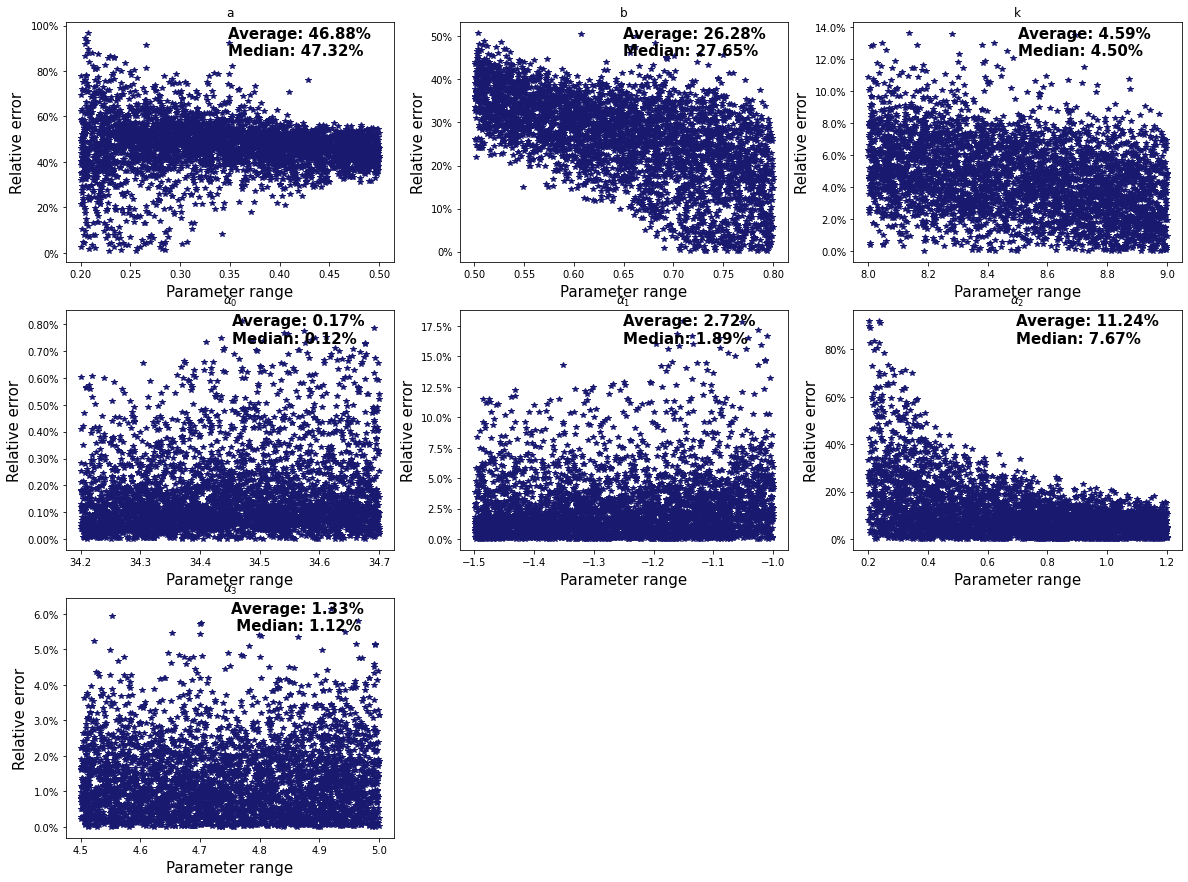

In [15]:
f = plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.plot(params_cal[:,0], percentage_err[:,0]*100, '*', color = 'midnightblue')
plt.title('a')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
s0 = 'Average: %.2f' %mean_percentage_err[0] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[0] + r'%'
plt.text(np.mean(params_cal[:,0]), np.max(percentage_err[:,0]*90), s0, fontsize=15, color = 'black', weight = 'bold')

plt.subplot(3,3,2)
plt.plot(params_cal[:,1], percentage_err[:,1]*100,'*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('b')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
s1 = 'Average: %.2f' %mean_percentage_err[1] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[1] + r'%'
plt.text(np.mean(params_cal[:,1]), np.max(percentage_err[:,1]*90), s1, fontsize=15, color = 'black', weight = 'bold')

plt.subplot(3,3,3)
plt.plot(params_cal[:,2], percentage_err[:,2]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('k')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
s2 = 'Average: %.2f' %mean_percentage_err[2] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[2] + r'%'
plt.text(np.mean(params_cal[:,2]), np.max(percentage_err[:,2]*90), s2, fontsize=15, color = 'black', weight = 'bold')

plt.subplot(3,3,4)
plt.plot(params_cal[:,3], percentage_err[:,3]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_0$')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
s2 = 'Average: %.2f' %mean_percentage_err[3] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[3] + r'%'
plt.text(np.mean(params_cal[:,3]), np.max(percentage_err[:,3]*90), s2, fontsize=15, color = 'black', weight = 'bold')

plt.subplot(3,3,5)
plt.plot(params_cal[:,4], percentage_err[:,4]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_1$')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
s2 = 'Average: %.2f' %mean_percentage_err[4] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[4] + r'%'
plt.text(np.mean(params_cal[:,4]), np.max(percentage_err[:,4]*90), s2, fontsize=15, color = 'black', weight = 'bold')

plt.subplot(3,3,6)
plt.plot(params_cal[:,5], percentage_err[:,5]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_2$')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
s2 = 'Average: %.2f' %mean_percentage_err[5] + r'%' + '\n' + 'Median: %.2f' %median_percentage_err[5] + r'%'
plt.text(np.mean(params_cal[:,5]), np.max(percentage_err[:,5]*90), s2, fontsize=15, color = 'black', weight = 'bold')

plt.subplot(3,3,7)
plt.plot(params_cal[:,6], percentage_err[:,6]*100, '*', color = 'midnightblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
plt.title('$\\alpha_3$')
plt.ylabel('Relative error',fontsize=15,labelpad=5);
plt.xlabel('Parameter range',fontsize=15,labelpad=5);
s2 = 'Average: %.2f' %mean_percentage_err[6] + r'%' +' \n '+ 'Median: %.2f' %median_percentage_err[6] + r'%'
plt.text(np.mean(params_cal[:,6]), np.max(percentage_err[:,6]*90), s2, fontsize=15, color = 'black', weight = 'bold');

#f.savefig('cal_pointwise_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)

In [20]:
np_input_first_rep = np.matlib.repmat(np_input_first, calibration_size, 1)
new_input_guess_rep = np.matlib.repmat(new_input_guess, 1, N1*N2).reshape((N1*N2*calibration_size,parameter_cal))

price_predicted_cal = model(np.concatenate([np_input_first_rep, new_input_guess_rep], axis = 1)).numpy()
price_predicted_cal = price_predicted_cal.reshape((calibration_size, N1, N2))

err_training_cal = abs(price_predicted_cal-price_cal)/price_cal

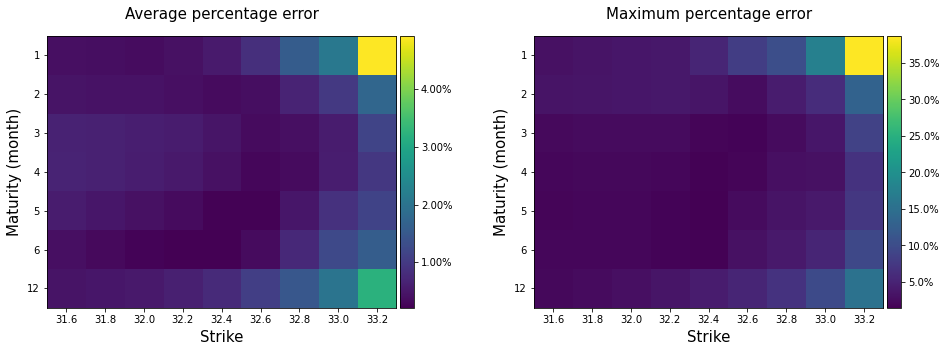

In [21]:
K_label = np.array([31.6, 31.8, 32.0, 32.2, 32.4, 32.6, 32.8, 33.0, 33.2])
tau_label = ['1', '2', '3', '4', '5', '6', '12']

f = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
mean_err = np.mean(100*err_training_cal,axis = 0)
plt.title("Average percentage error", fontsize = 15, y = 1.04)
plt.imshow(np.transpose(mean_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);

ax = plt.subplot(1,2,2)
plt.title("Maximum percentage error", fontsize = 15, y = 1.04)
max_err = np.max(100*err_training_cal,axis = 0)
plt.imshow(np.transpose(max_err))
plt.colorbar(format = mtick.PercentFormatter(), pad=0.01, fraction=0.046)
ax.set_xticks(np.linspace(0,N1-1,N1))
ax.set_xticklabels(K_label)
ax.set_yticks(np.linspace(0,N2-1,N2))
ax.set_yticklabels(tau_label)
plt.xlabel("Strike",fontsize=15,labelpad=5);
plt.ylabel("Maturity (month)",fontsize=15,labelpad=5);
#f.savefig('error_step2_pointwise_with_NS.pdf', bbox_inches = 'tight', pad_inches = 0.01)